# 과제

## 주식데이터 분석하기

### data 가져오기

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn]))) import io
df = pd.read_csv(io.StringIO(uploaded['kakao_stock.csv'].decode('cp949')), dtype = str)
df

Saving kakao_stock.csv to kakao_stock.csv
User uploaded file "kakao_stock.csv" with length 32894 bytes


,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2021/02/23,487000,-3500,-0.71,481500,492500,477000,665417,322240649000,43182127829000,88669667
1,2021/02/22,490500,-13500,-2.68,505000,510000,490000,640993,318698772000,43492471663500,88669667
2,2021/02/19,504000,3000,0.60,497000,506000,490000,695664,345815290000,44689512168000,88669667
3,2021/02/18,501000,-8000,-1.57,506000,517000,501000,466922,236538803000,44423503167000,88669667
4,2021/02/17,509000,-5000,-0.97,515000,515000,503000,562572,285858658000,45132860503000,88669667
...,...,...,...,...,...,...,...,...,...,...,...
278,2020/01/08,159500,-500,-0.31,158500,162000,156500,851619,135601348500,13751089297000,86213726
279,2020/01/07,160000,5500,3.56,155000,160000,154500,840186,133085985000,13794196160000,86213726
280,2020/01/06,154500,2000,1.31,150500,155000,150000,393715,60244311500,13320020667000,86213726
281,2020/01/03,152500,0,0.00,153500,155000,151000,314848,48099078500,13147593215000,86213726


### data 전처리

In [3]:
from datetime import datetime
df['일자'] = pd.to_datetime(df['일자'],format='%Y/%m/%d')
df

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2021-02-23,487000,-3500,-0.71,481500,492500,477000,665417,322240649000,43182127829000,88669667
1,2021-02-22,490500,-13500,-2.68,505000,510000,490000,640993,318698772000,43492471663500,88669667
2,2021-02-19,504000,3000,0.60,497000,506000,490000,695664,345815290000,44689512168000,88669667
3,2021-02-18,501000,-8000,-1.57,506000,517000,501000,466922,236538803000,44423503167000,88669667
4,2021-02-17,509000,-5000,-0.97,515000,515000,503000,562572,285858658000,45132860503000,88669667
...,...,...,...,...,...,...,...,...,...,...,...
278,2020-01-08,159500,-500,-0.31,158500,162000,156500,851619,135601348500,13751089297000,86213726
279,2020-01-07,160000,5500,3.56,155000,160000,154500,840186,133085985000,13794196160000,86213726
280,2020-01-06,154500,2000,1.31,150500,155000,150000,393715,60244311500,13320020667000,86213726
281,2020-01-03,152500,0,0.00,153500,155000,151000,314848,48099078500,13147593215000,86213726


In [4]:
df[['종가',	'대비',	'등락률',	'시가',	'고가',	'저가',	'거래량',	'거래대금',	'시가총액',	'상장주식수']] = df[['종가',	'대비',	'등락률',	'시가',	'고가',	'저가',	'거래량',	'거래대금',	'시가총액',	'상장주식수']].astype(float)
df 

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2021-02-23,487000.0,-3500.0,-0.71,481500.0,492500.0,477000.0,665417.0,3.222406e+11,4.318213e+13,88669667.0
1,2021-02-22,490500.0,-13500.0,-2.68,505000.0,510000.0,490000.0,640993.0,3.186988e+11,4.349247e+13,88669667.0
2,2021-02-19,504000.0,3000.0,0.60,497000.0,506000.0,490000.0,695664.0,3.458153e+11,4.468951e+13,88669667.0
3,2021-02-18,501000.0,-8000.0,-1.57,506000.0,517000.0,501000.0,466922.0,2.365388e+11,4.442350e+13,88669667.0
4,2021-02-17,509000.0,-5000.0,-0.97,515000.0,515000.0,503000.0,562572.0,2.858587e+11,4.513286e+13,88669667.0
...,...,...,...,...,...,...,...,...,...,...,...
278,2020-01-08,159500.0,-500.0,-0.31,158500.0,162000.0,156500.0,851619.0,1.356013e+11,1.375109e+13,86213726.0
279,2020-01-07,160000.0,5500.0,3.56,155000.0,160000.0,154500.0,840186.0,1.330860e+11,1.379420e+13,86213726.0
280,2020-01-06,154500.0,2000.0,1.31,150500.0,155000.0,150000.0,393715.0,6.024431e+10,1.332002e+13,86213726.0
281,2020-01-03,152500.0,0.0,0.00,153500.0,155000.0,151000.0,314848.0,4.809908e+10,1.314759e+13,86213726.0


In [5]:
result_df = df[df['거래량']!=0]
result_df

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2021-02-23,487000.0,-3500.0,-0.71,481500.0,492500.0,477000.0,665417.0,3.222406e+11,4.318213e+13,88669667.0
1,2021-02-22,490500.0,-13500.0,-2.68,505000.0,510000.0,490000.0,640993.0,3.186988e+11,4.349247e+13,88669667.0
2,2021-02-19,504000.0,3000.0,0.60,497000.0,506000.0,490000.0,695664.0,3.458153e+11,4.468951e+13,88669667.0
3,2021-02-18,501000.0,-8000.0,-1.57,506000.0,517000.0,501000.0,466922.0,2.365388e+11,4.442350e+13,88669667.0
4,2021-02-17,509000.0,-5000.0,-0.97,515000.0,515000.0,503000.0,562572.0,2.858587e+11,4.513286e+13,88669667.0
...,...,...,...,...,...,...,...,...,...,...,...
278,2020-01-08,159500.0,-500.0,-0.31,158500.0,162000.0,156500.0,851619.0,1.356013e+11,1.375109e+13,86213726.0
279,2020-01-07,160000.0,5500.0,3.56,155000.0,160000.0,154500.0,840186.0,1.330860e+11,1.379420e+13,86213726.0
280,2020-01-06,154500.0,2000.0,1.31,150500.0,155000.0,150000.0,393715.0,6.024431e+10,1.332002e+13,86213726.0
281,2020-01-03,152500.0,0.0,0.00,153500.0,155000.0,151000.0,314848.0,4.809908e+10,1.314759e+13,86213726.0


### index 세팅

In [6]:
result_df = result_df.set_index('일자')
result_df

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
일자,,,,,,,,,,
2021-02-23,487000.0,-3500.0,-0.71,481500.0,492500.0,477000.0,665417.0,3.222406e+11,4.318213e+13,88669667.0
2021-02-22,490500.0,-13500.0,-2.68,505000.0,510000.0,490000.0,640993.0,3.186988e+11,4.349247e+13,88669667.0
2021-02-19,504000.0,3000.0,0.60,497000.0,506000.0,490000.0,695664.0,3.458153e+11,4.468951e+13,88669667.0
2021-02-18,501000.0,-8000.0,-1.57,506000.0,517000.0,501000.0,466922.0,2.365388e+11,4.442350e+13,88669667.0
2021-02-17,509000.0,-5000.0,-0.97,515000.0,515000.0,503000.0,562572.0,2.858587e+11,4.513286e+13,88669667.0
...,...,...,...,...,...,...,...,...,...,...
2020-01-08,159500.0,-500.0,-0.31,158500.0,162000.0,156500.0,851619.0,1.356013e+11,1.375109e+13,86213726.0
2020-01-07,160000.0,5500.0,3.56,155000.0,160000.0,154500.0,840186.0,1.330860e+11,1.379420e+13,86213726.0
2020-01-06,154500.0,2000.0,1.31,150500.0,155000.0,150000.0,393715.0,6.024431e+10,1.332002e+13,86213726.0


### 그래프 그리기

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text

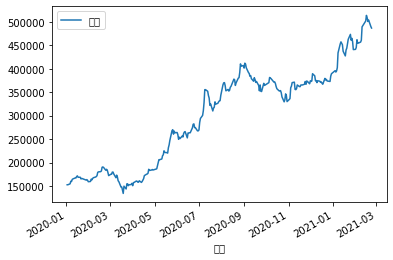

In [7]:
result_df.plot(y='종가')

# Pandas

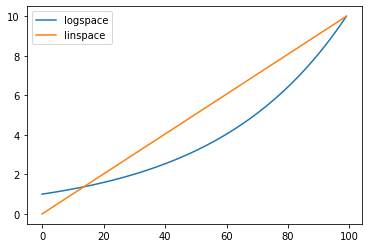

In [8]:
import numpy as np
import pandas as pd

logx = np.logspace(0,1,100)
linx = np.linspace(0,10,100)

df = pd.DataFrame()
df['logspace'] = logx 
df['linspace'] = linx

df.head()
df.plot()

In [9]:
pd.Series([1,2,3,4],index=['one','two','three','four'])

one      1
two      2
three    3
four     4
dtype: int64

In [10]:
pd.DataFrame([1,2,3,4],index=['one','two','three','four'],columns = ['number'])

,number
one,1
two,2
three,3
four,4


In [11]:
firm_name = {"03":'IBK기업은행', "11" : "NH농협은행" , "20" : "우리카드", 
             "23" : "SC제일은행", "48":"새마을금고", "72":"우체국"}

df = pd.DataFrame.from_dict(firm_name,orient='index',columns = ['FIRM_NAME'])
df

,FIRM_NAME
03,IBK기업은행
11,NH농협은행
20,우리카드
23,SC제일은행
48,새마을금고
72,우체국
